# Clone YOLOv5 repository

In [4]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!git reset --hard

Cloning into 'yolov5'...
remote: Enumerating objects: 14384, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14384 (delta 4), reused 8 (delta 1), pack-reused 14371
Receiving objects: 100% (14384/14384), 13.61 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (9898/9898), done.
/content/yolov5
HEAD is now at 454dae1 Ultralytics Live Session 2 - Roboflow https://youtu.be/LKpuzZllNpA (#10426)


In [5]:
%pip install -qr requirements.txt

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

     |████████████████████████████████| 182 kB 34.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 54.3 MB/s 
Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


In [6]:
import os
from google.colab import files
import shutil

from getpass import getpass

from IPython.core.magic import register_line_cell_magic

import torch
import utils
import glob
from IPython.display import Image, clear_output, display


# Import Library

In [7]:
!pip install roboflow
from roboflow import Roboflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Download Dataset

In [8]:
os.getcwd()

'/content/yolov5'

In [9]:
secret_key = getpass('Enter API Key to roboflow: ')

Enter API Key to roboflow: ··········


In [10]:
rf = Roboflow(api_key=secret_key)
project = rf.workspace("pdata1").project("tomato416_8c")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to tomato416_8c-3 in yolov5pytorch:: 100%|██████████| 3456/3456 [00:01<00:00, 2990.81it/s]


In [11]:
# project_2 = rf.workspace("mfakhrulamcapstone").project("tomato-leaf-diseases")
# dataset_2 = project_2.version(1).download("yolov5")

In [13]:
print(dataset.location)
# print(dataset_2.location)

/content/yolov5/tomato416_8c-3


In [14]:
%cat {dataset.location}/data.yaml

names:
- Tomato Early blight leaf
- Tomato Septoria leaf spot
- Tomato leaf bacterial spot
- Tomato leaf late blight
- Tomato leaf mosaic virus
- Tomato leaf yellow virus
- Tomato leaf
- Tomato mold leaf
nc: 8
train: tomato416_8c-3/train/images
val: tomato416_8c-3/valid/images


In [15]:
# %cat {dataset_2.location}/data.yaml

# Change class number in yolov5s.yaml

In [16]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    class_num = str(yaml.safe_load(stream)['nc'])

# with open(dataset_2.location + "/data.yaml", 'r') as stream:
#     class_num_2 = str(yaml.safe_load(stream)['nc'])

In [17]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [18]:
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [19]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {class_num}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [20]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 8  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [21]:
# %cat /content/yolov5/models/custom_yolov5s_2.yaml

# Download YOLOv5s.pt

In [22]:
# !wget https://github.com/ultralytics/yolov5/releases/download/v6.2/yolov5s.pt

# Train Dataset with Transfer Learning using YOLOv5s

In [23]:
os.getcwd()

'/content/yolov5'

In [25]:
%%time
!python train.py --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --img 640 --cache

train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/yolov5/tomato416_8c-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.15 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

In [ ]:
# %%time
# !python train.py --batch 16 --epochs 100 --data {dataset_2.location}/data.yaml --cfg ./models/custom_yolov5s_2.yaml --weights '' --name yolov5s_2_results  --img 640 --cache

In [ ]:
# %%time
# !python train.py --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results  --img 640 --cache --freeze 10


Val predicted:


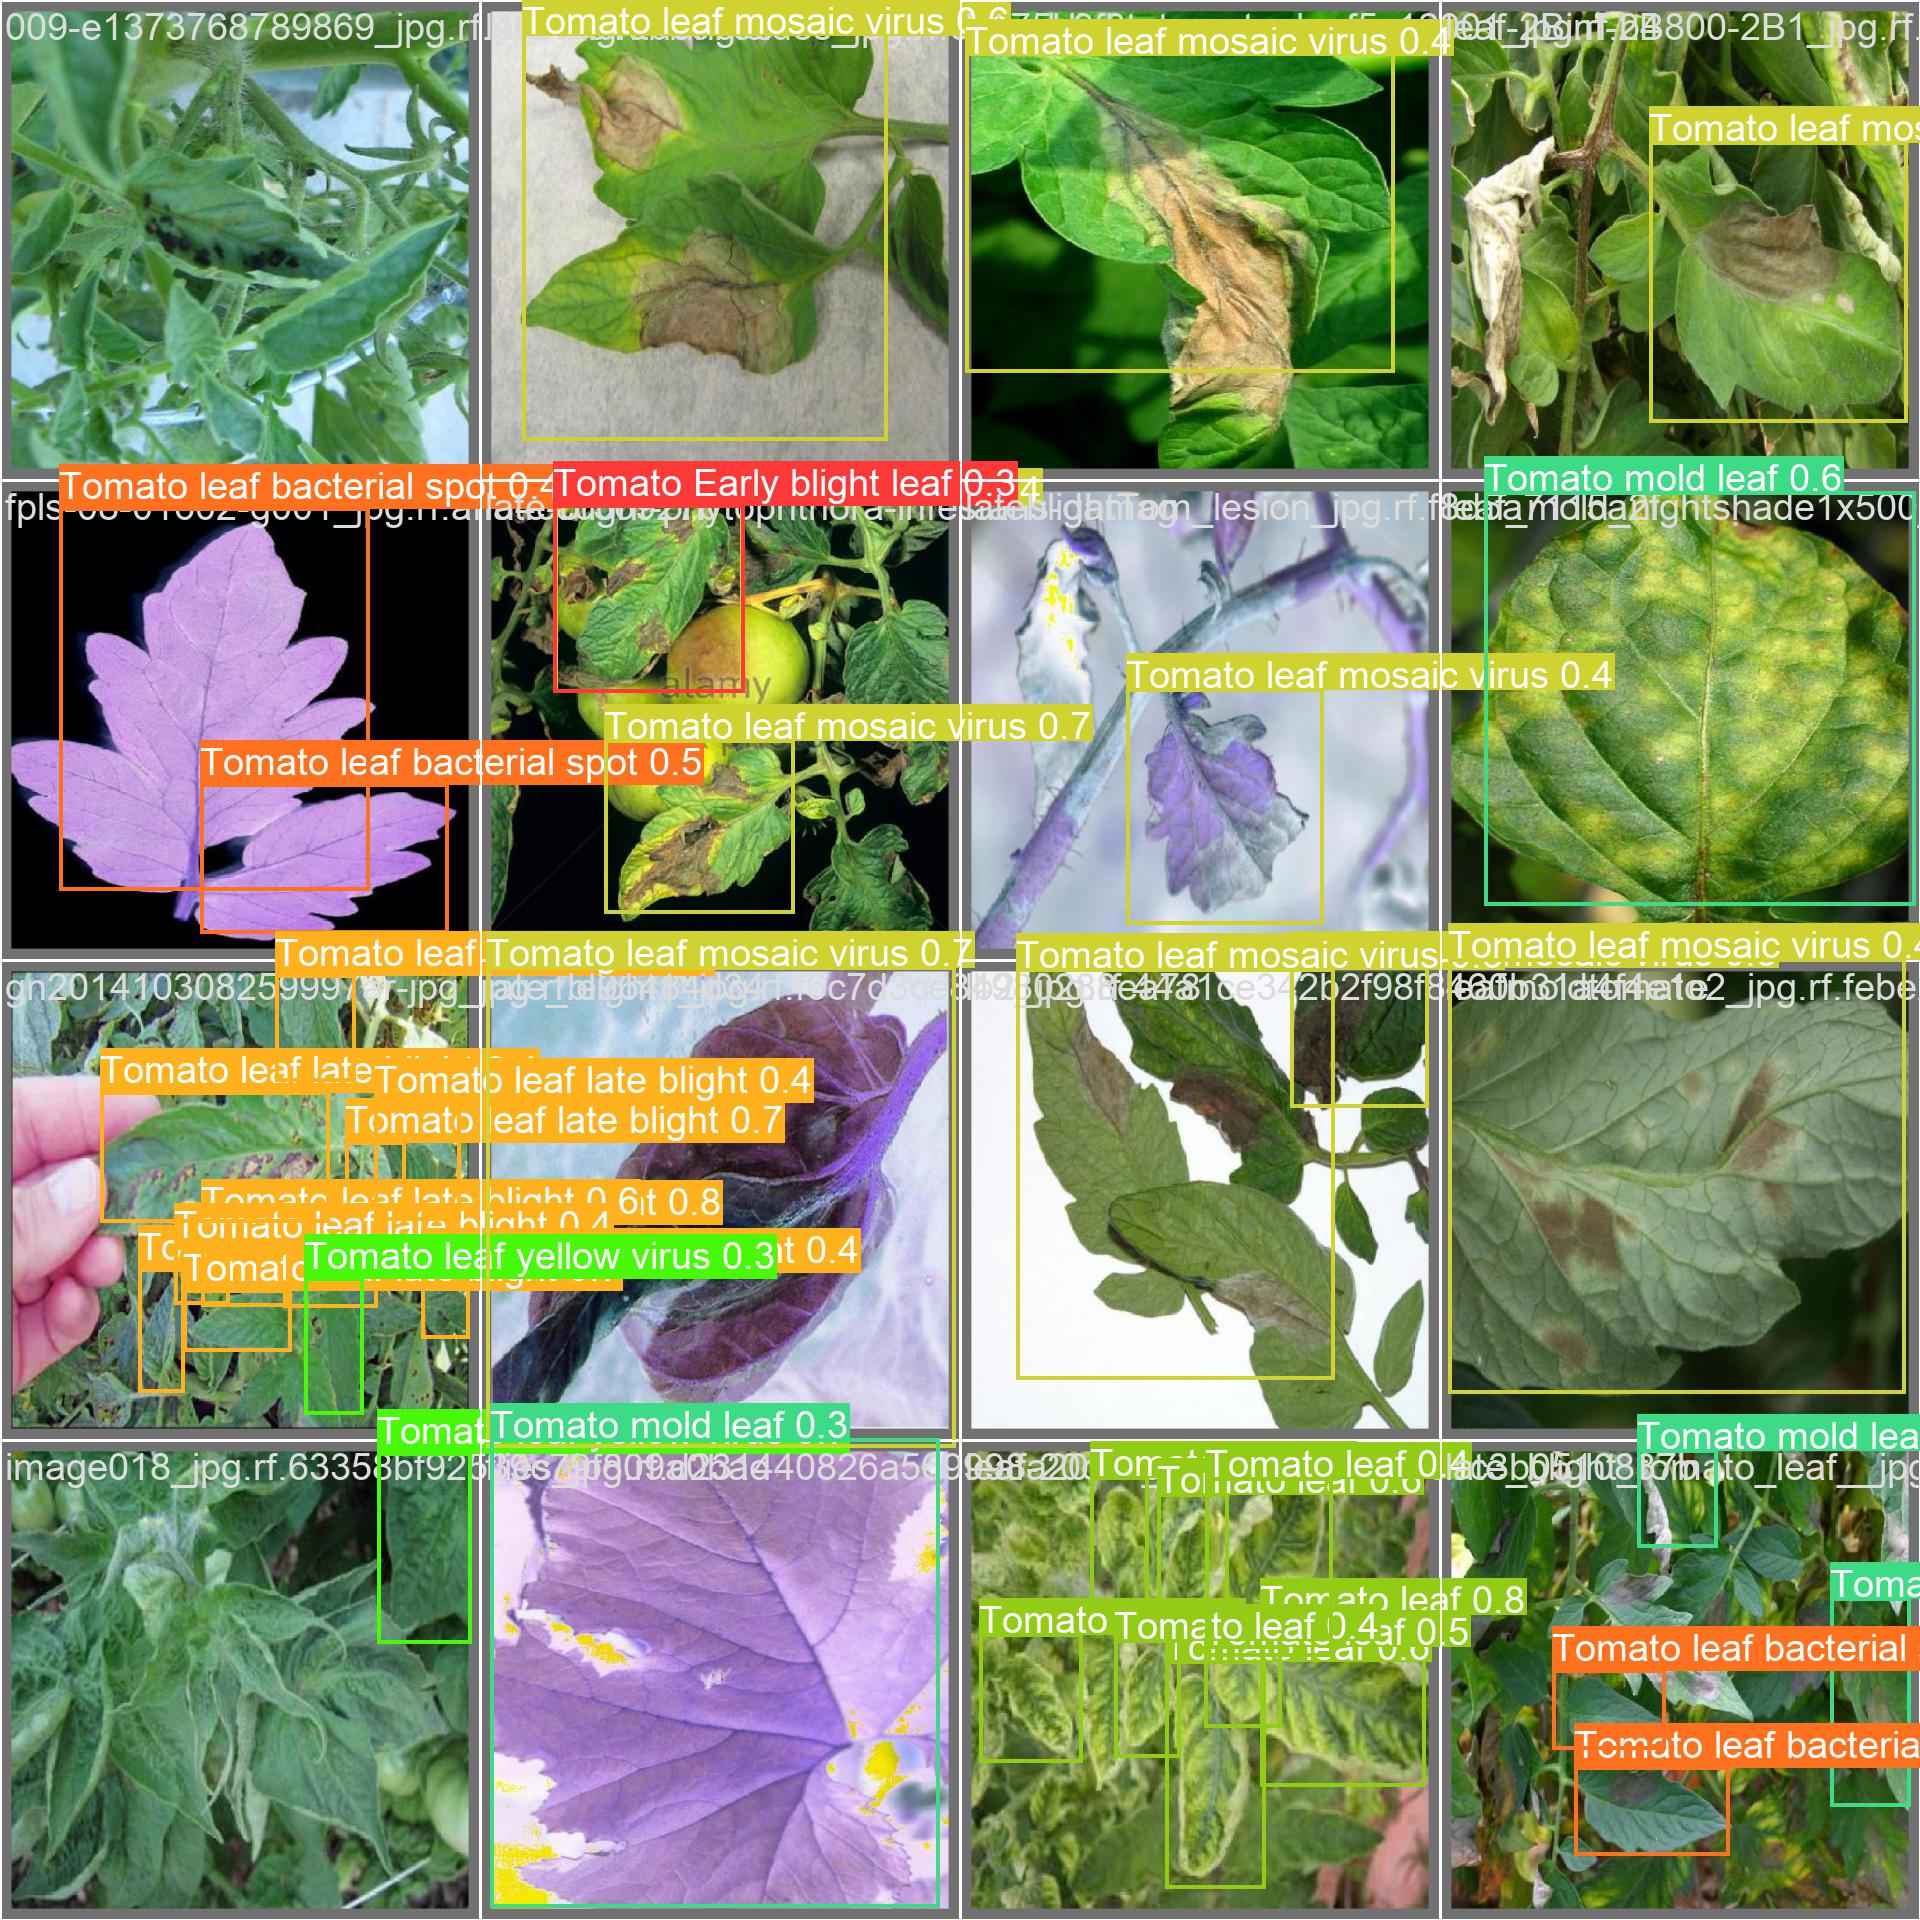

Real val:


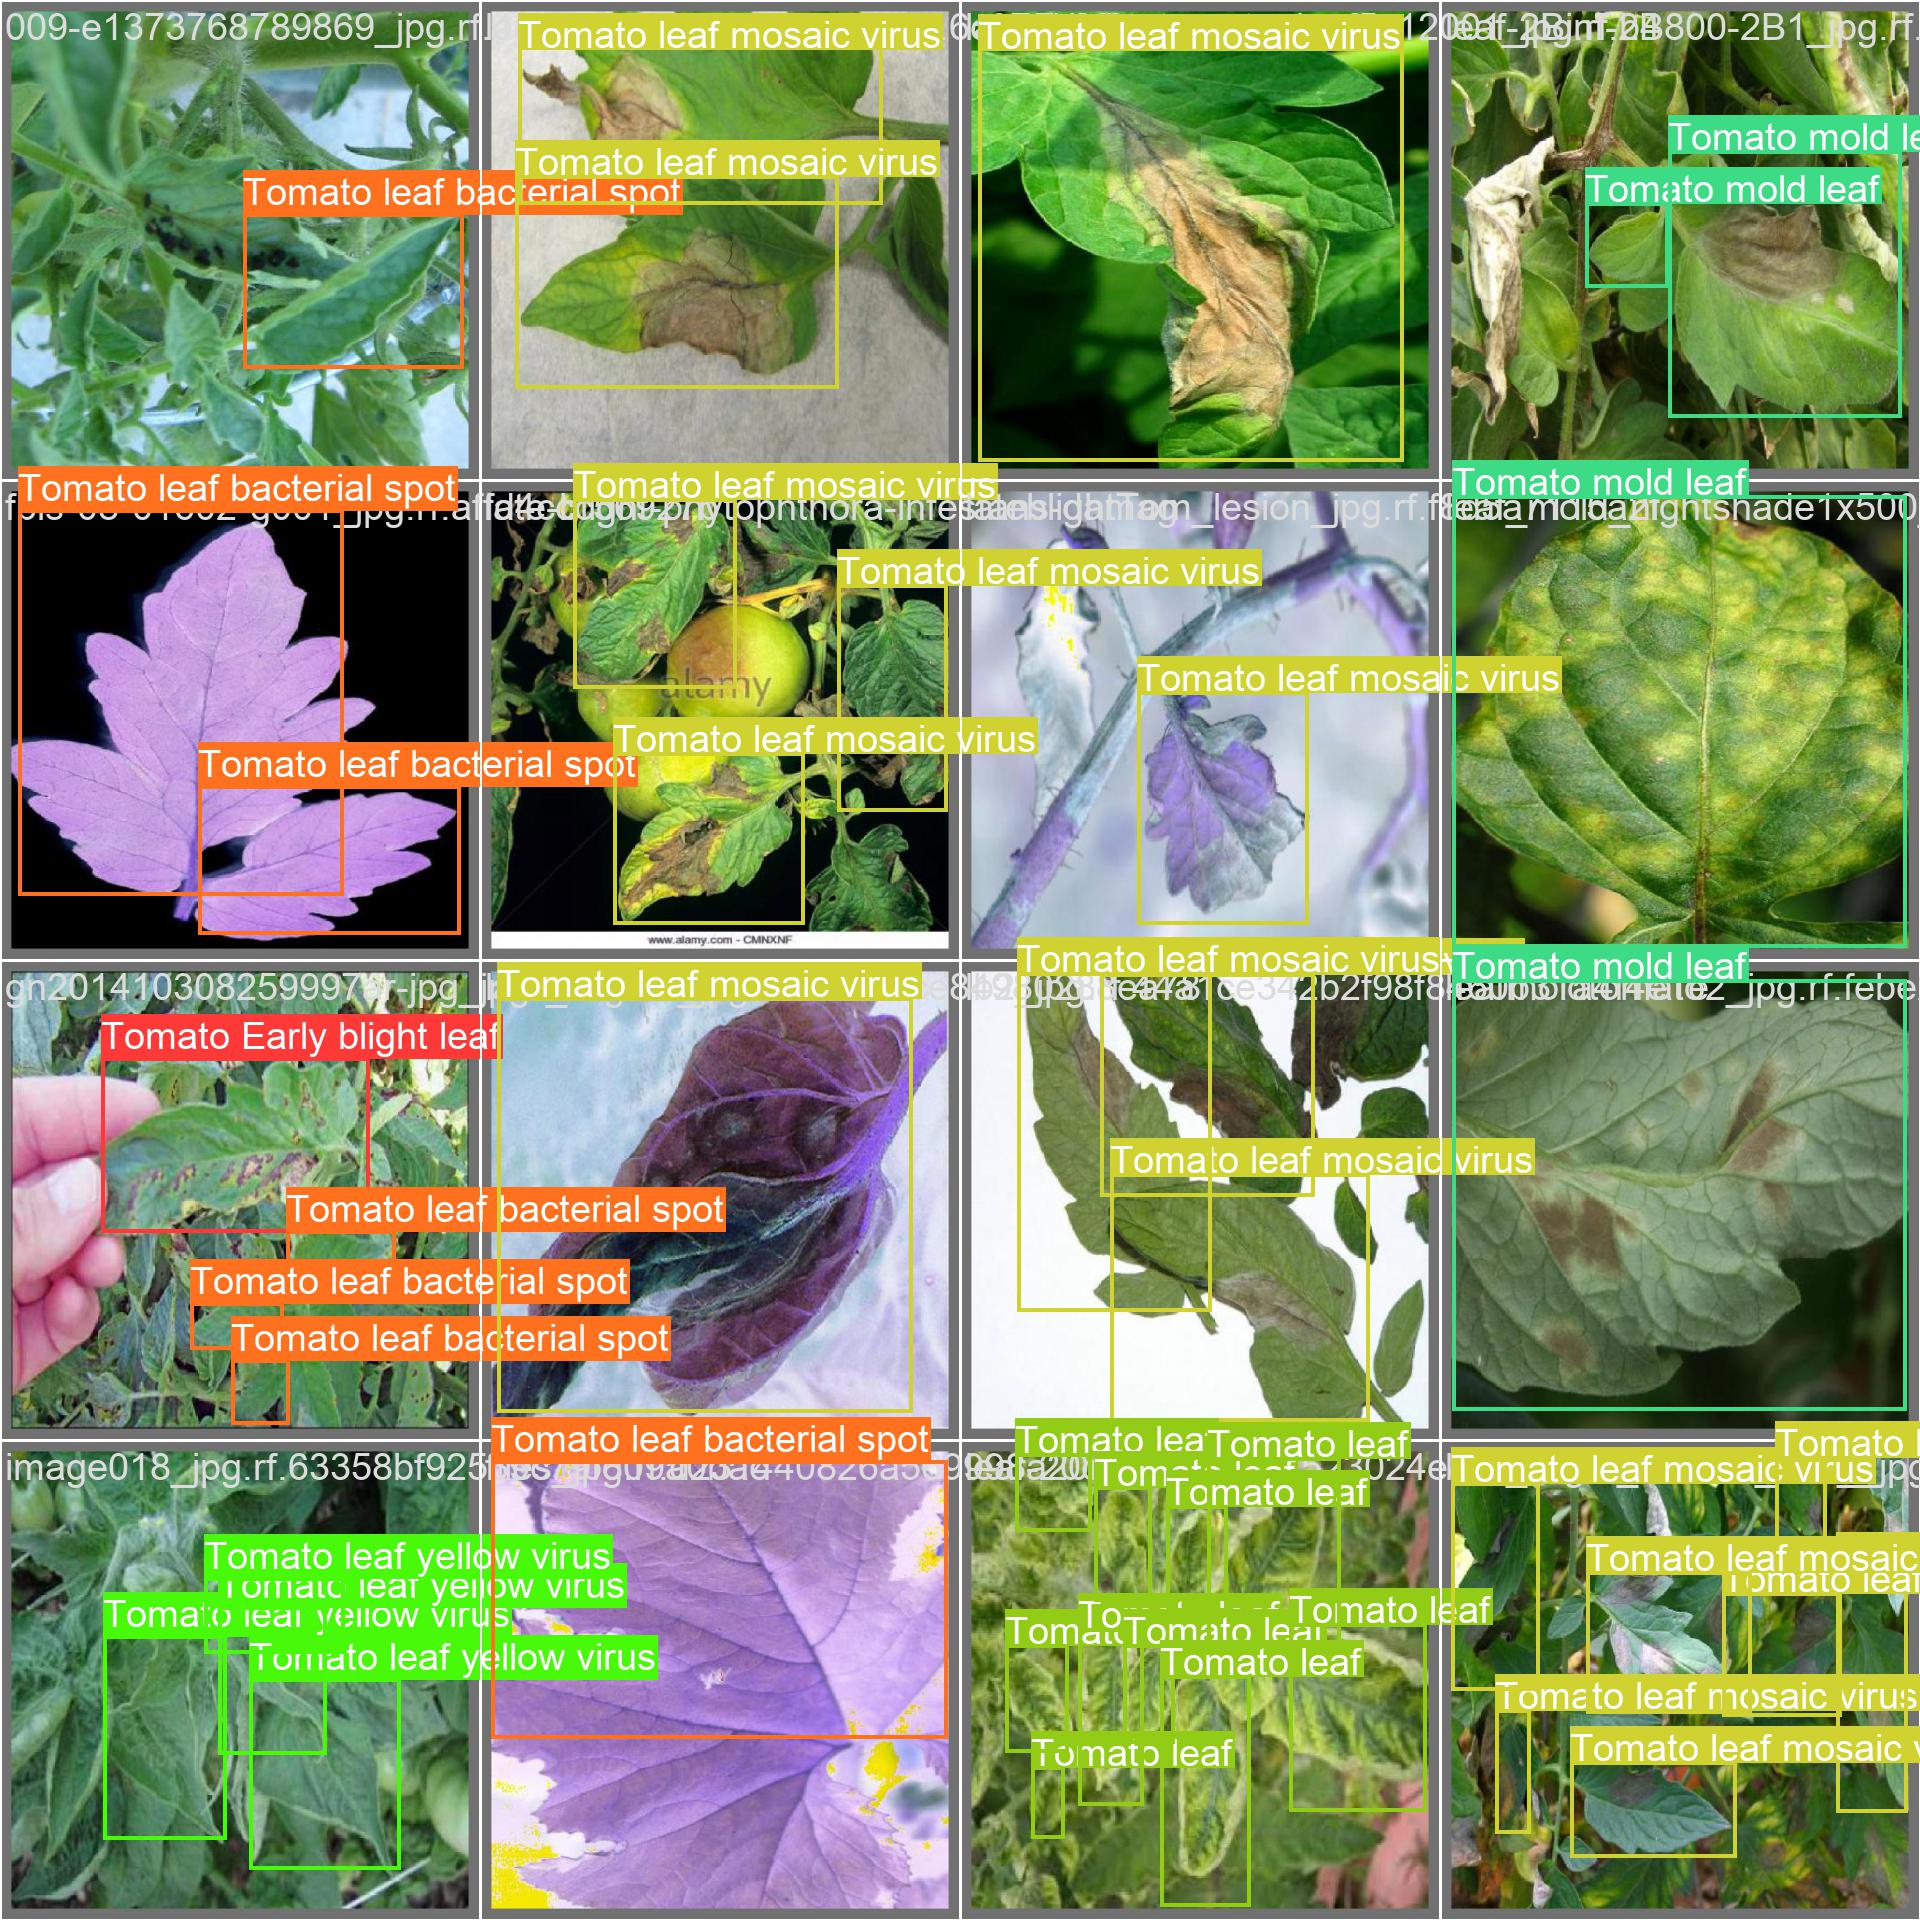

In [27]:
val_pred = 'runs/train/yolov5s_results/val_batch0_pred.jpg'
val_label = 'runs/train/yolov5s_results/val_batch0_labels.jpg'
print("Val predicted:")
display(Image(filename=val_pred, width=500))
print("Real val:")
display(Image(filename=val_label, width=500))

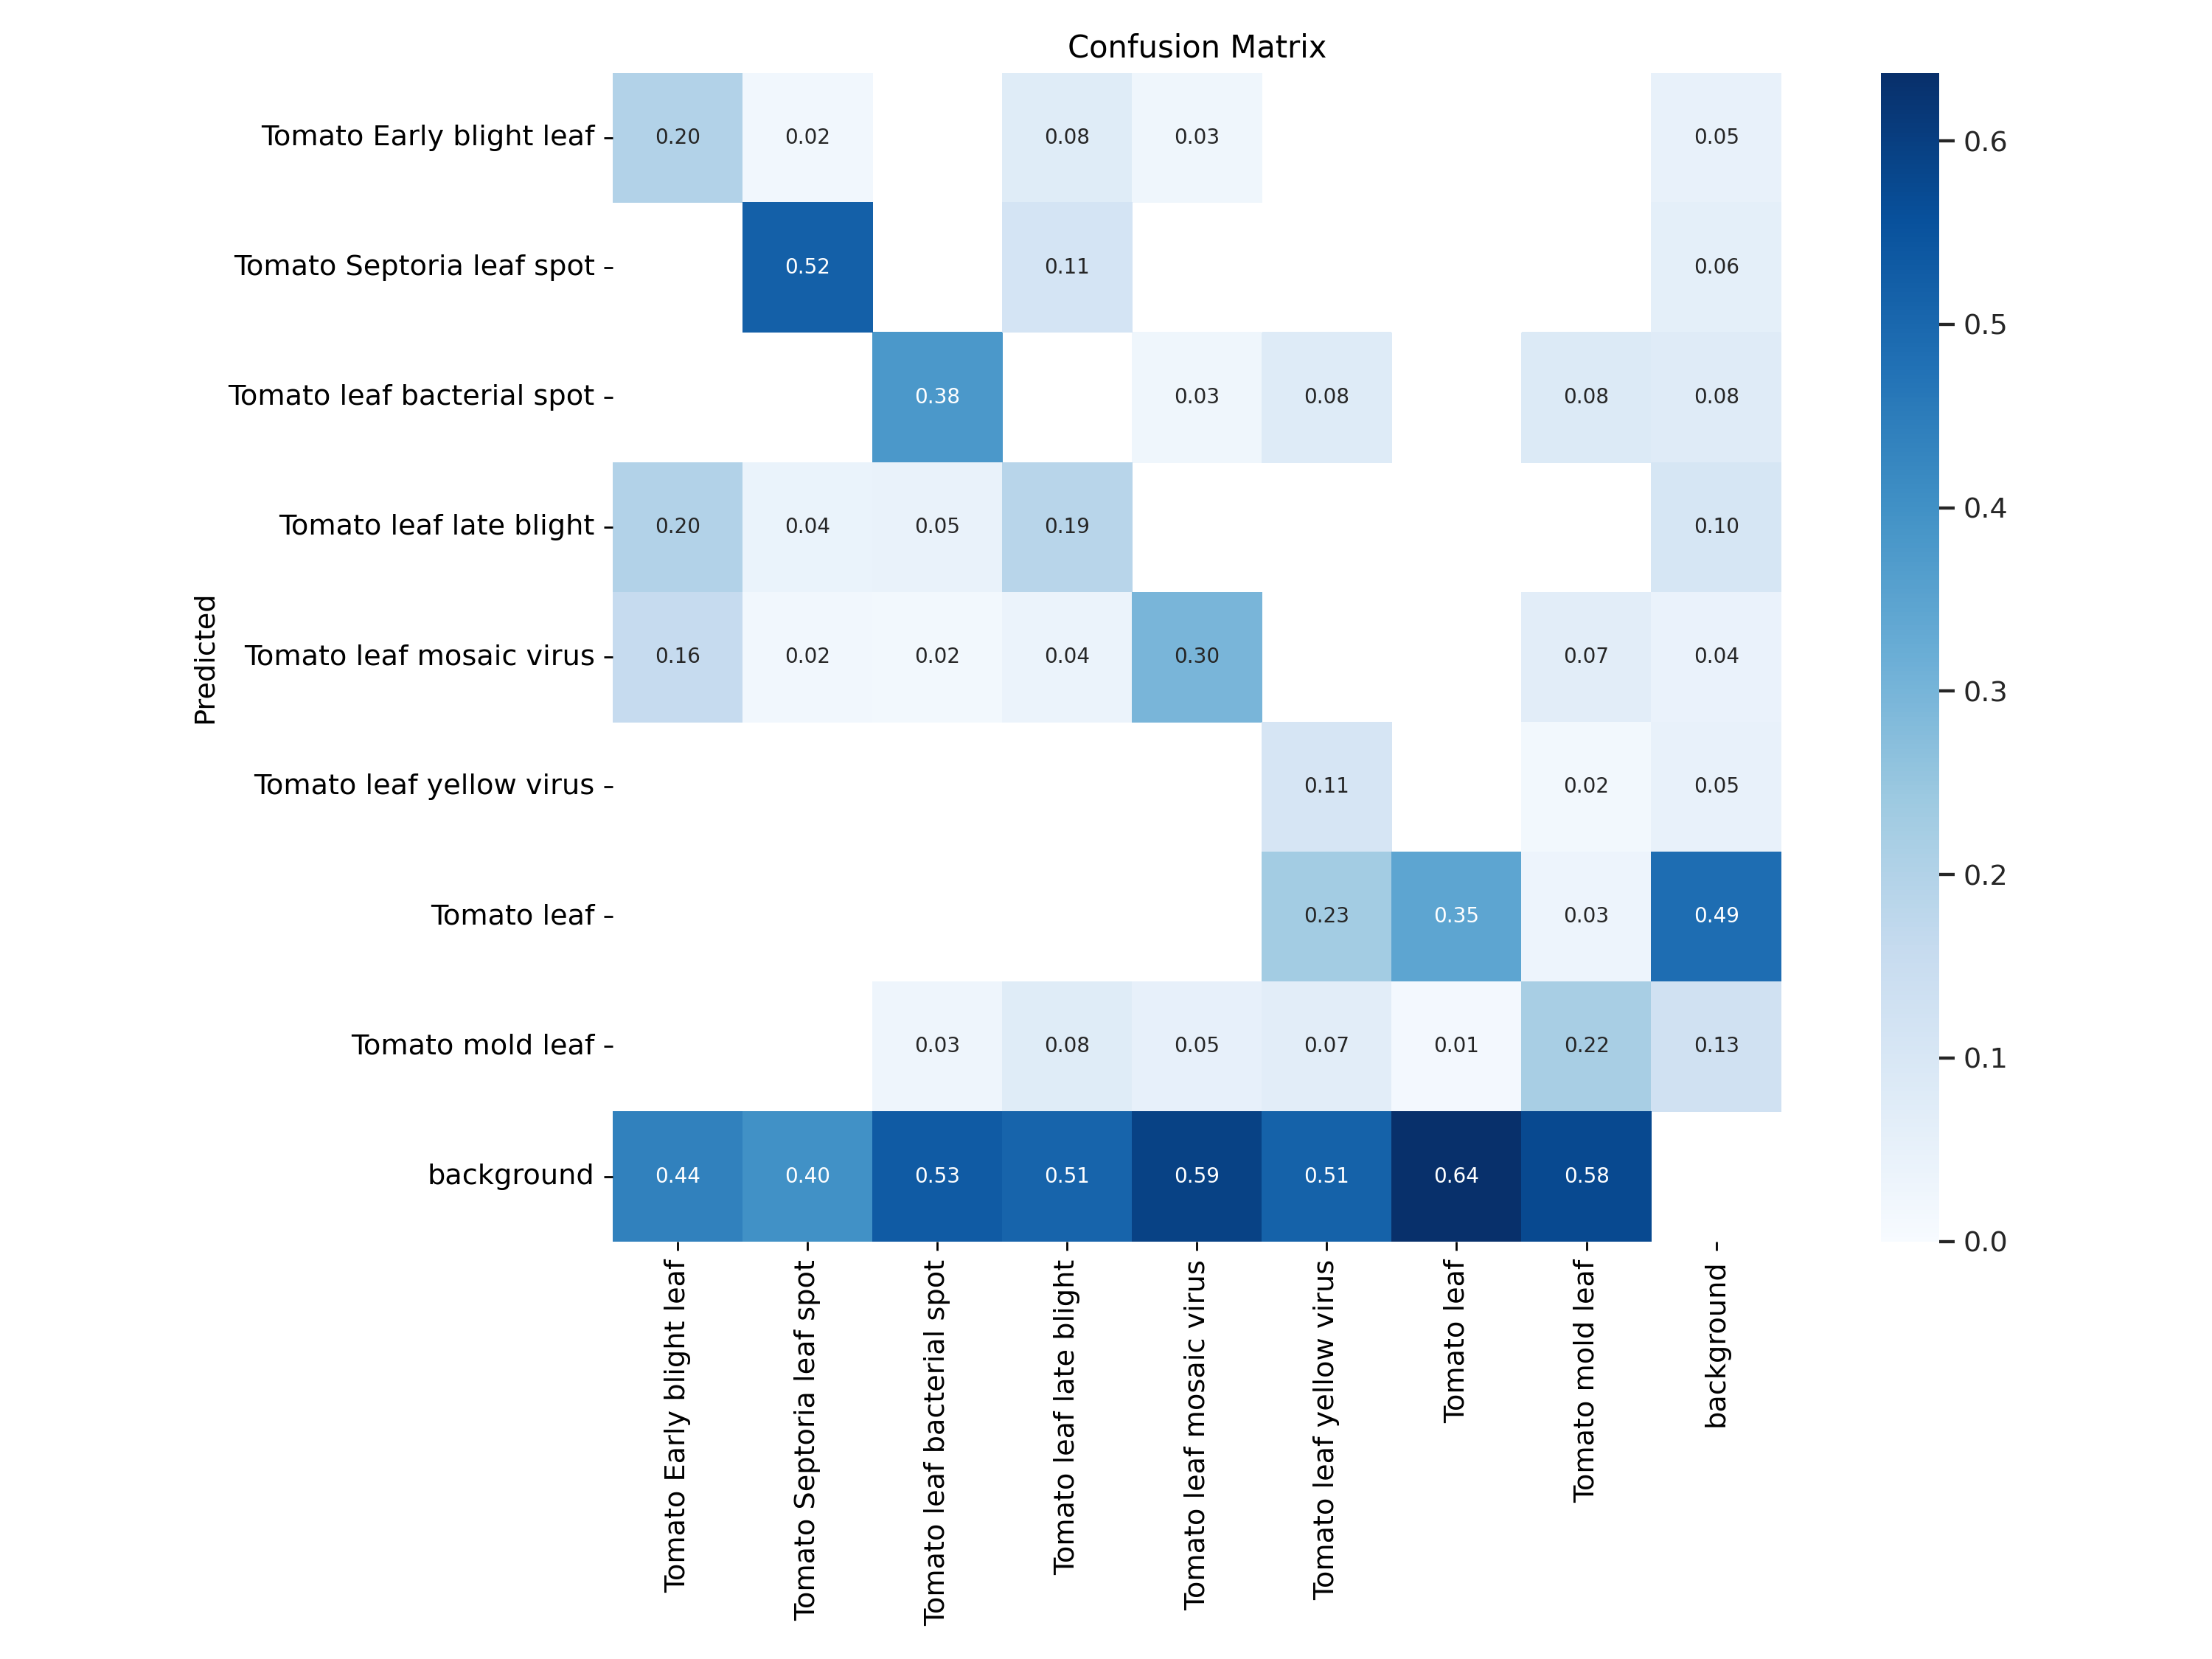

In [28]:
Image(filename='runs/train/yolov5s_results/confusion_matrix.png', width=500)

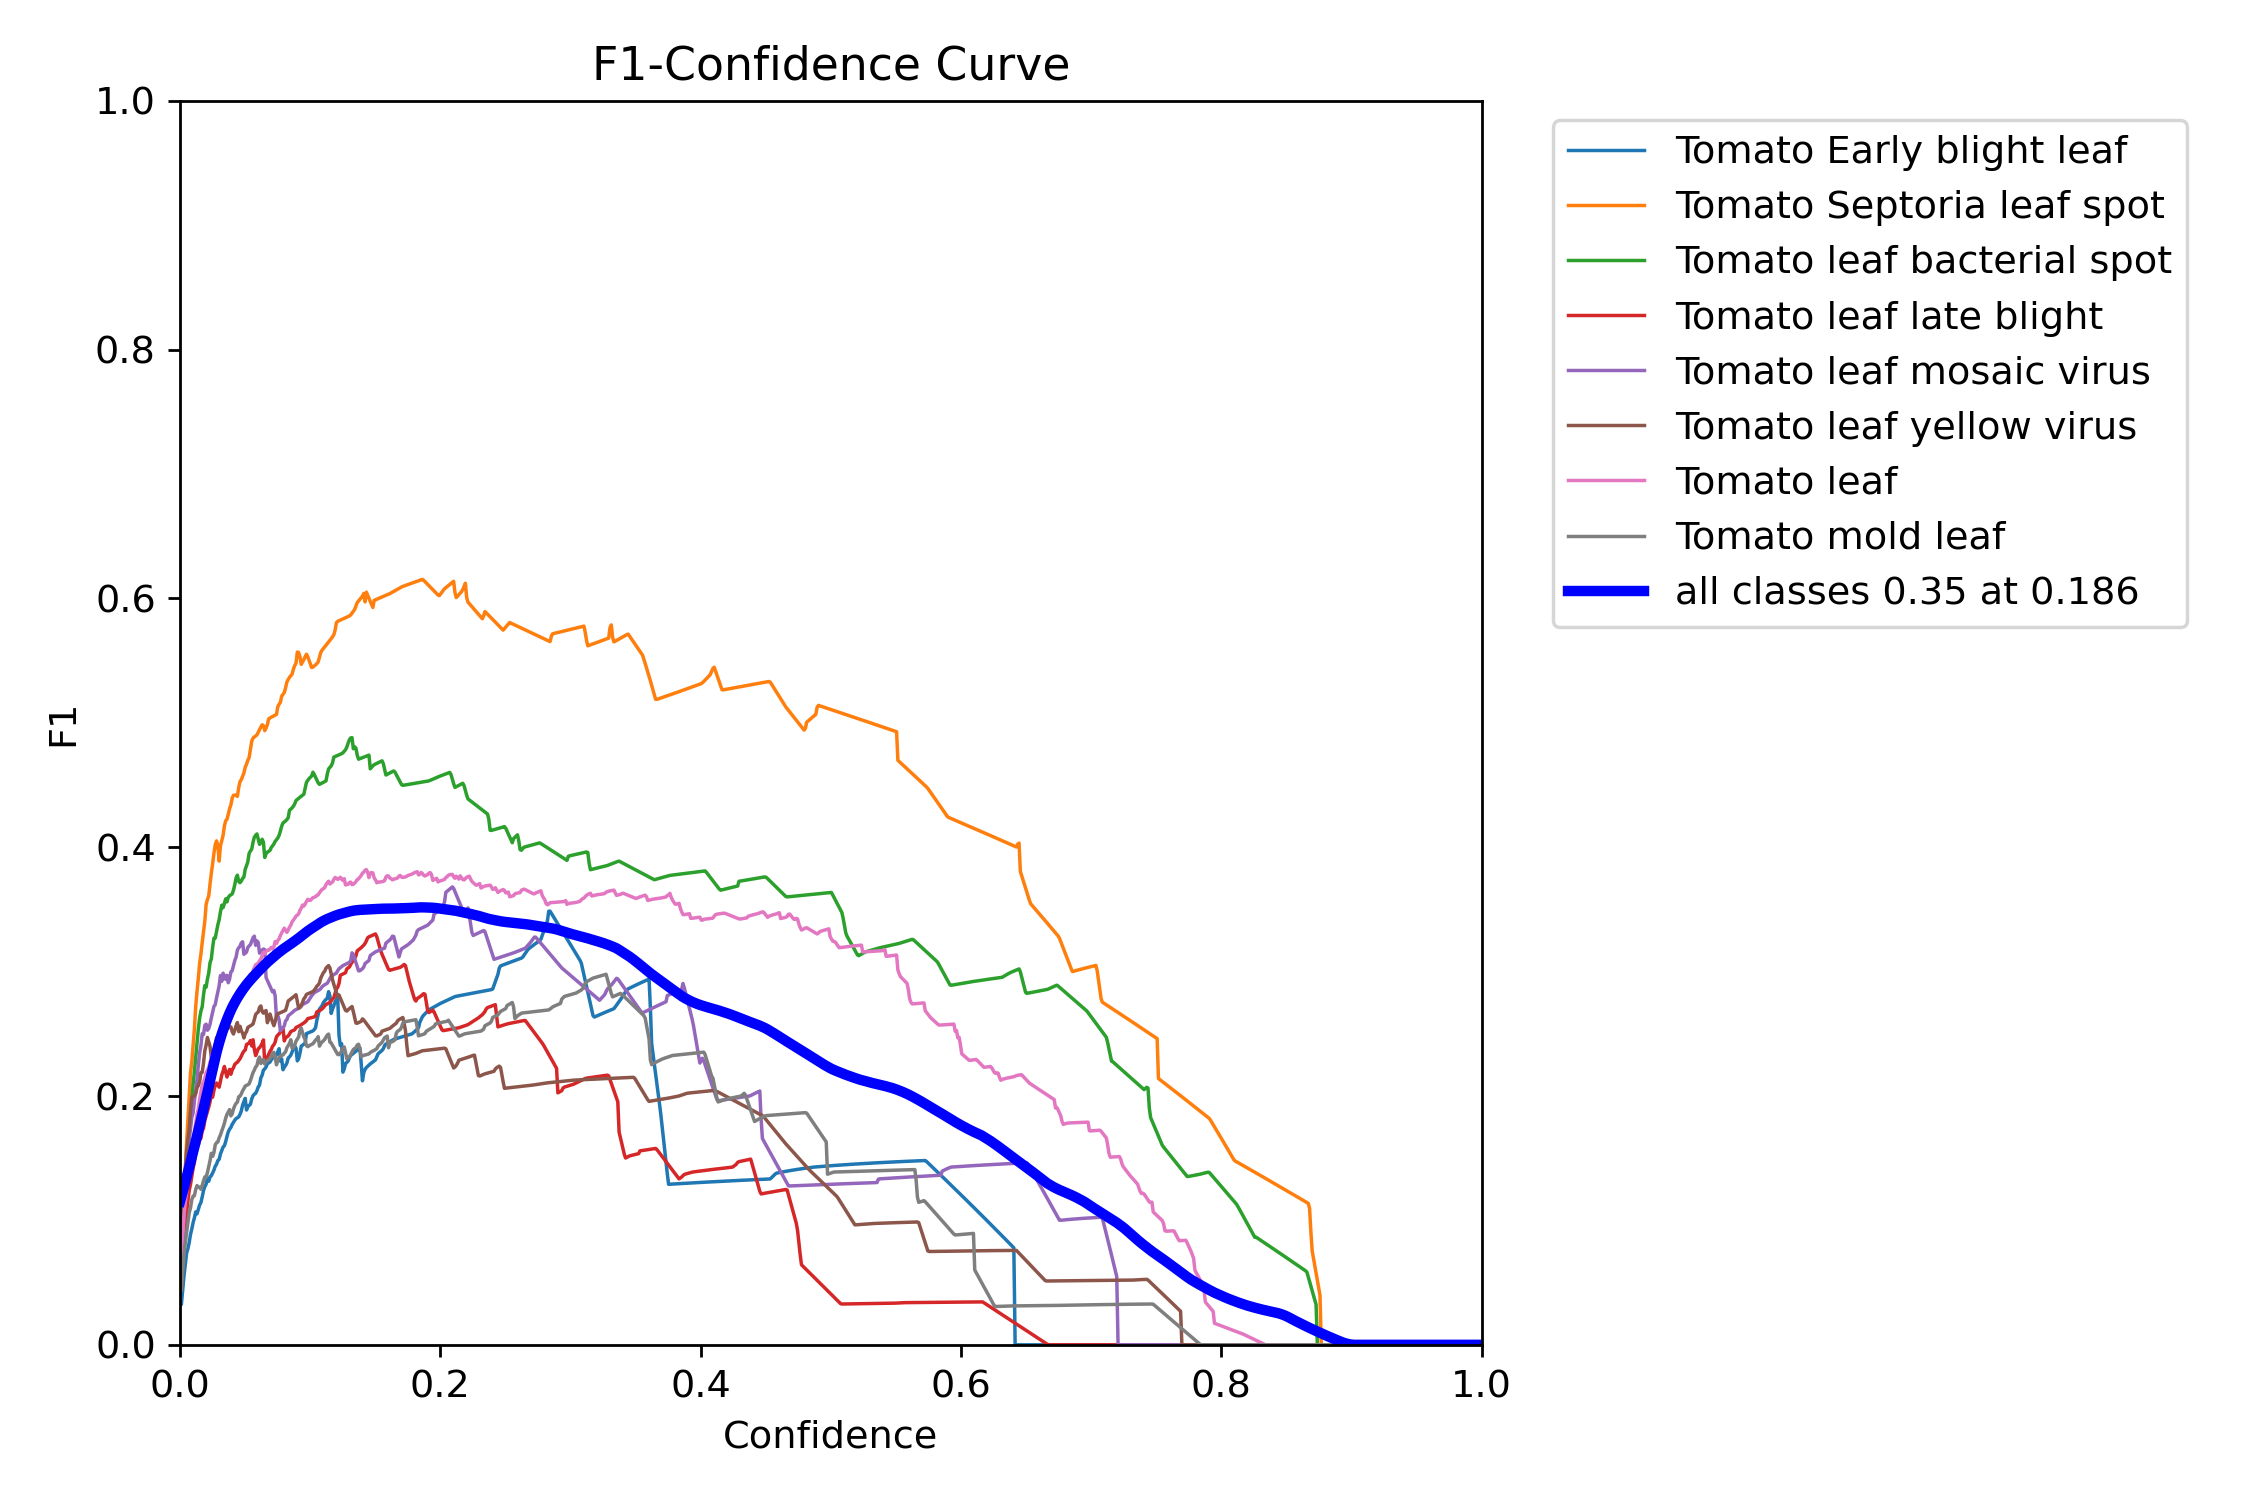

In [29]:
Image(filename='runs/train/yolov5s_results/F1_curve.png', width=500)

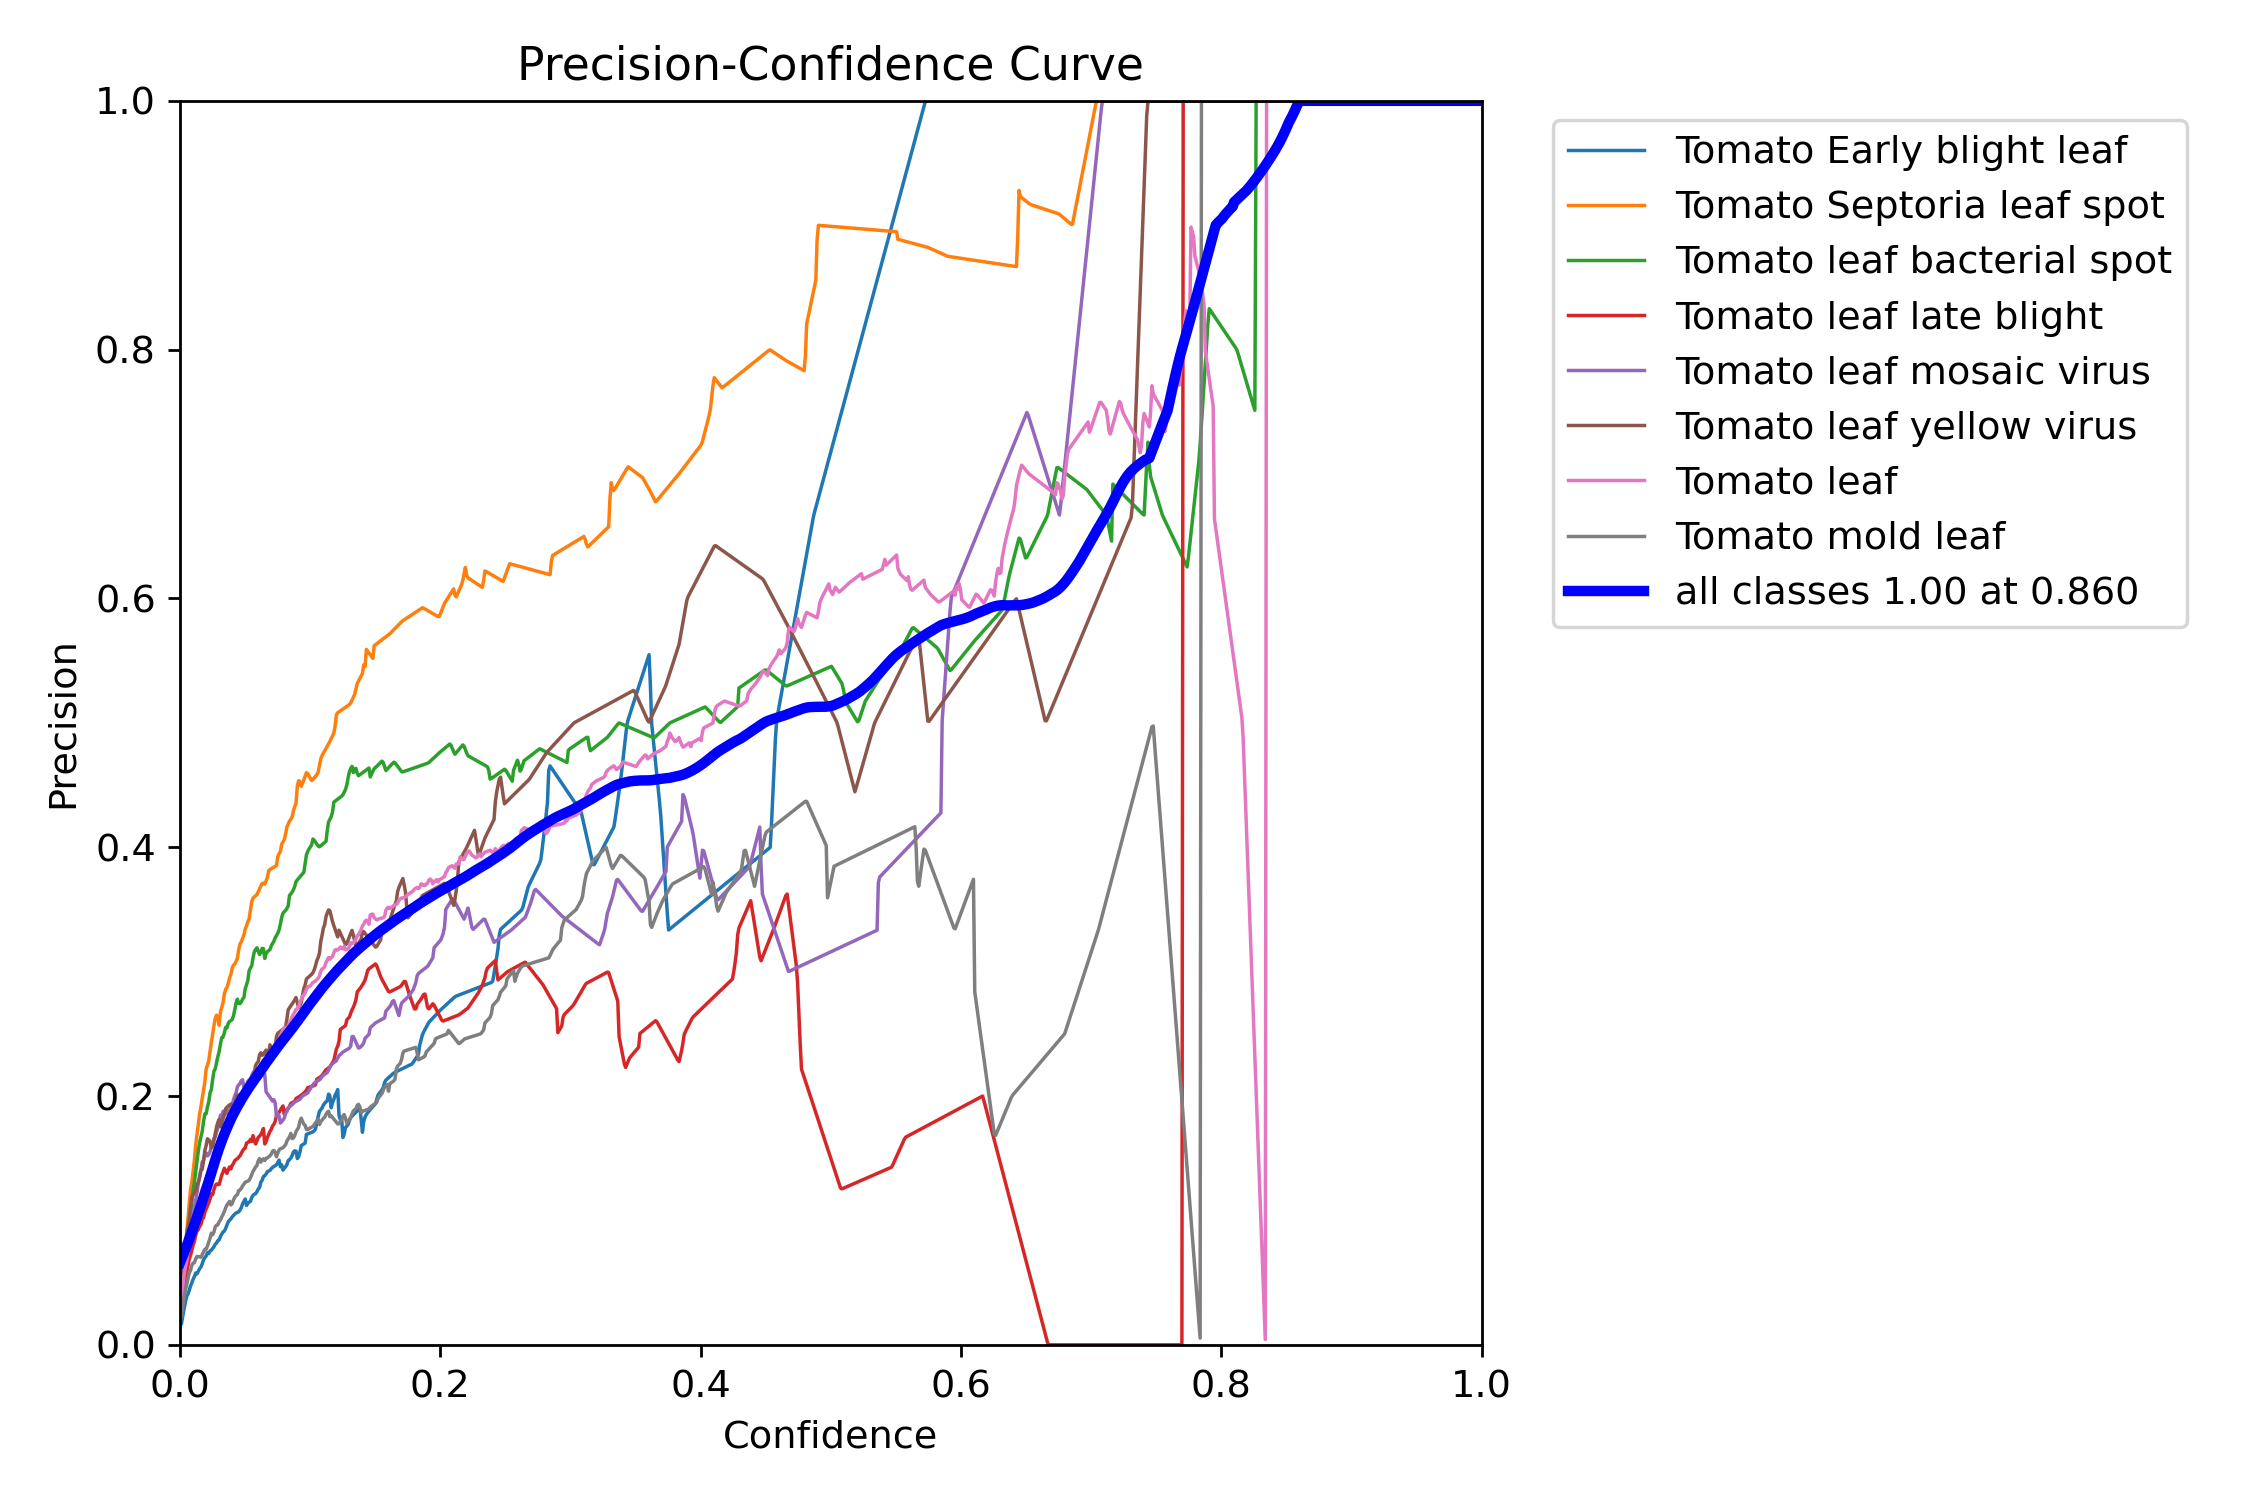

In [30]:
Image(filename='runs/train/yolov5s_results/P_curve.png', width=500)


In [31]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640  --source /content/yolov5/tomato416_8c-3/test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/tomato416_8c-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.15 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/72 /content/yolov5/tomato416_8c-3/test/images/05-069f1_jpg.rf.cae5c76065356a6ff2e025c302c31b75.jpg: 640x640 1 Tomato Septoria leaf spot, 12.7ms
image 2/72 /content/yolov5/tomato416_8c-3/test/images/126689-004-D622CD2F_jpg.rf.87032aa71a8bcf86189514f546d03f4d.jpg: 640x640 (no detections), 12.7ms


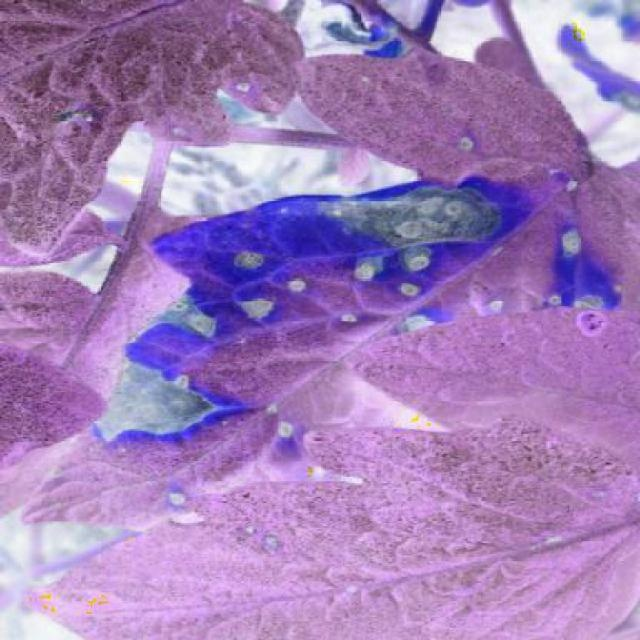

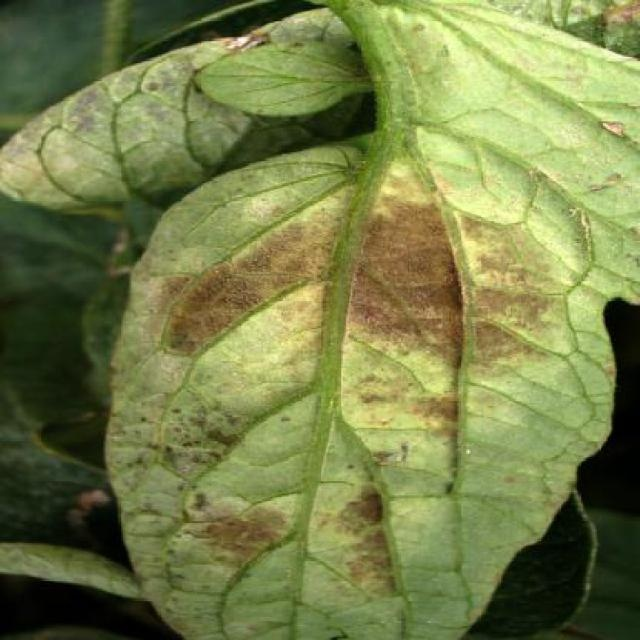

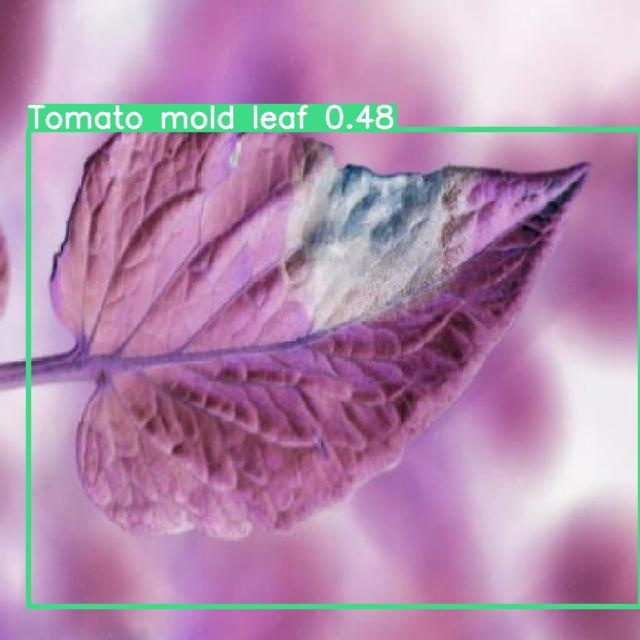

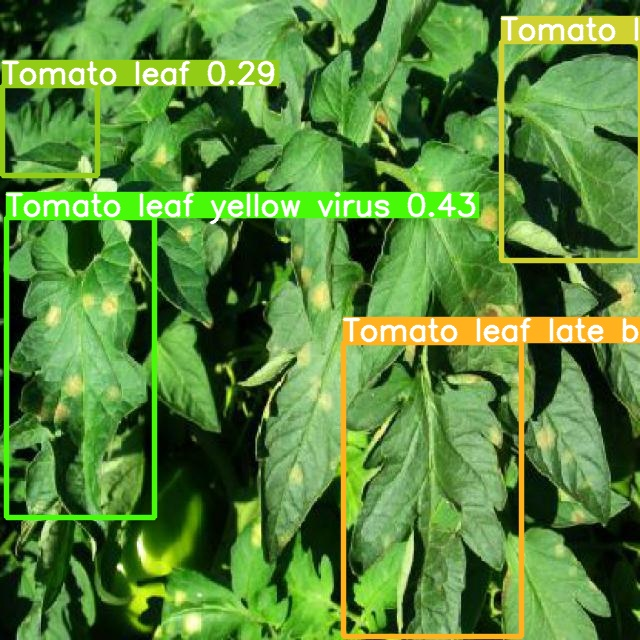

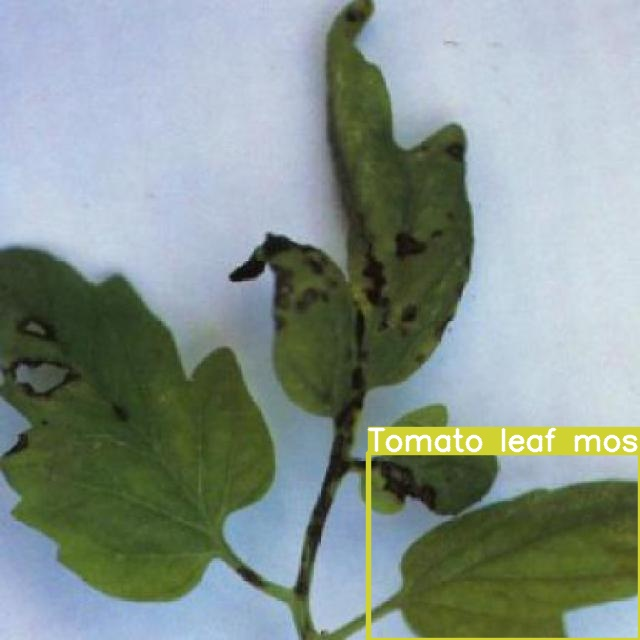

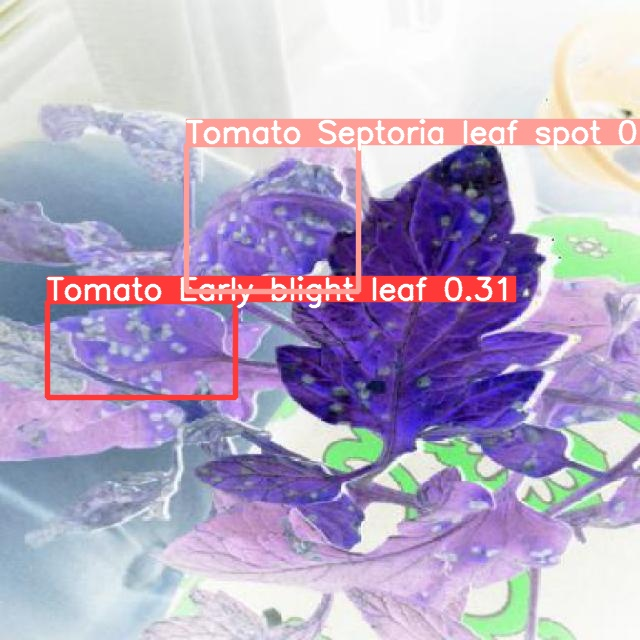

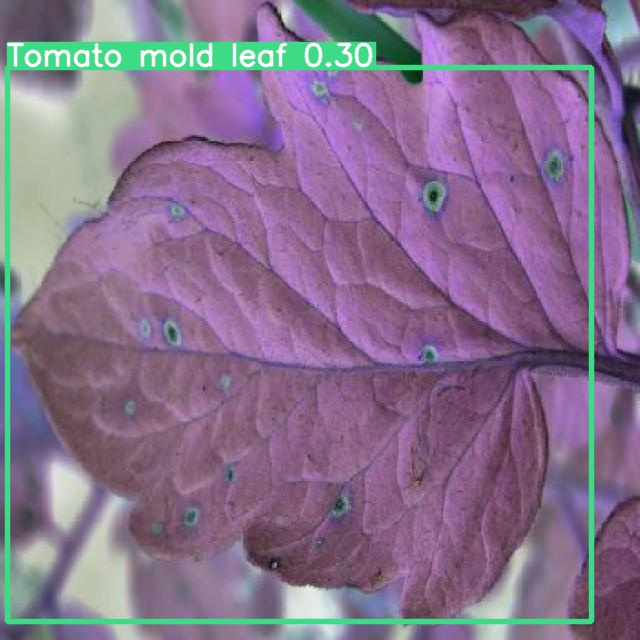

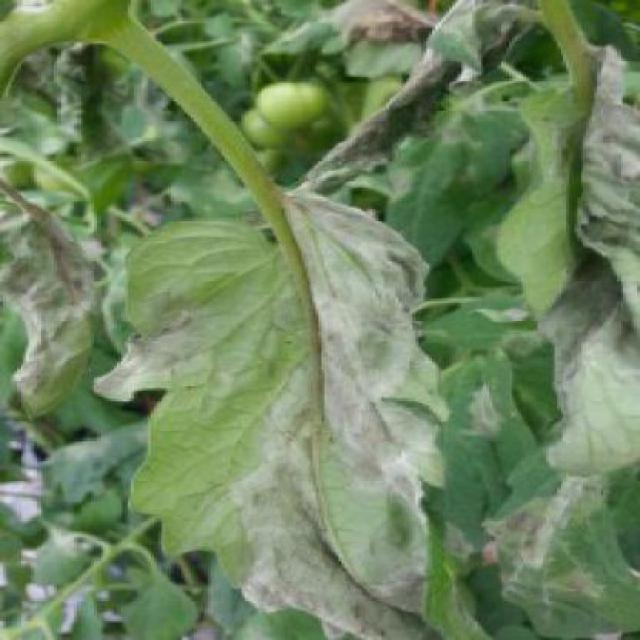

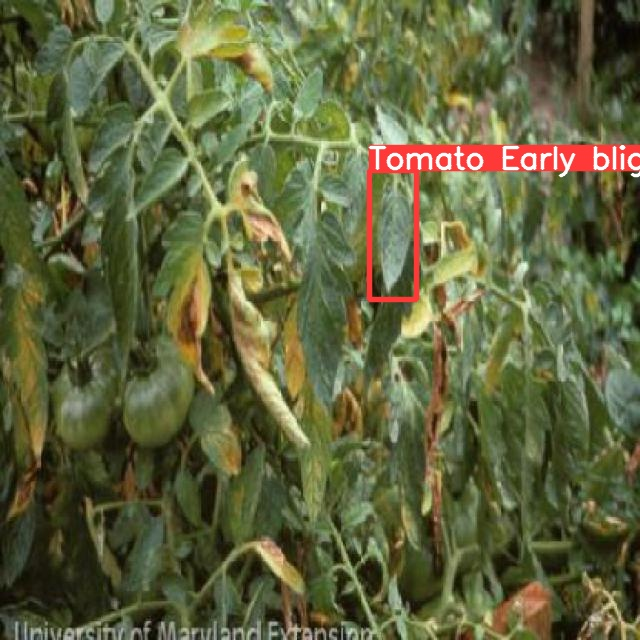

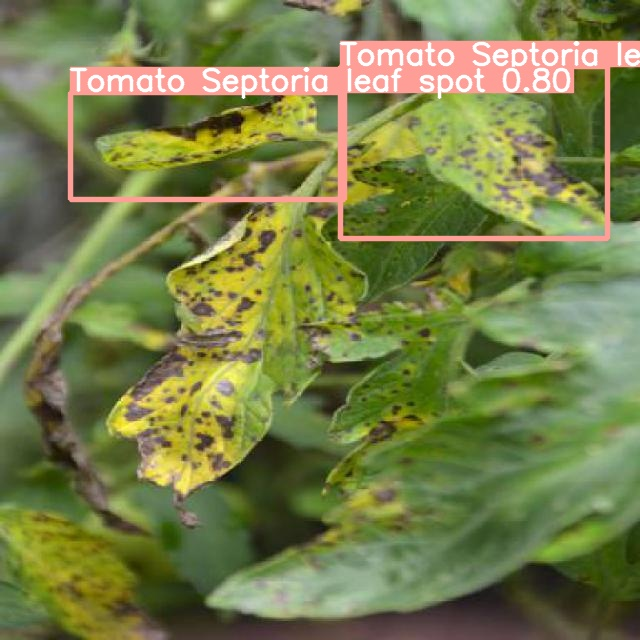

In [35]:
i = 0
limit = 10
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    if i < limit:
      display(Image(filename=imageName, width=300))
      print("\n")
    i = i + 1

# Download Result

In [36]:
def make_archive(source, destination):
    base = os.path.basename(destination)
    name = base.split('.')[0]
    format = base.split('.')[1]
    archive_from = os.path.dirname(source)
    archive_to = os.path.basename(source.strip(os.sep))
    shutil.make_archive(name, format, archive_from, archive_to)
    shutil.move('%s.%s'%(name,format), destination)

In [37]:
make_archive('/content/yolov5/runs/train/yolov5s_results', '/content/yolov5s_results.zip')

In [38]:
files.download("/content/yolov5s_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>